In [247]:
#Wavelet ECG Analysis
#Written by Jared Rybarczyk
#Using 3 separate wavelet types (morlet, ricker, and custom(ricker based)) to analyze ECG data for the purposes of visualizing
#time-frequency information


#Import the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal as sig
import neurokit2 as nk

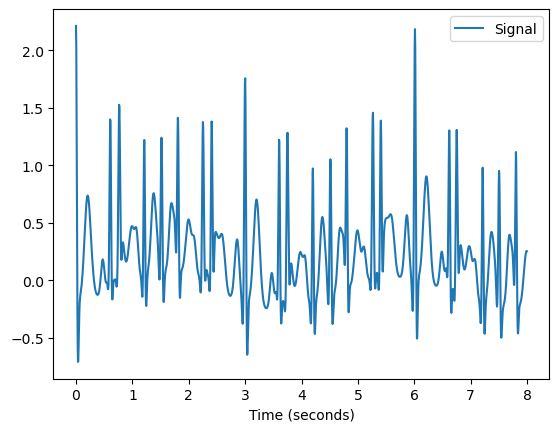

In [248]:
#Simulate some ECG data with the neurokit library

sim_ecg_base = nk.ecg_simulate(duration=8, sampling_rate=200, heart_rate=80)
sim_ecg_tachy = nk.ecg_simulate(duration=8, sampling_rate=200, heart_rate=100)
sim_ecg_total = sim_ecg_base + sim_ecg_tachy
nk.signal_plot(sim_ecg_total, sampling_rate=200)
plt.show()

In [249]:
#Define a custom wavelet for the continuous wavelet transform. This one was based upon a combination of the ricker wavelet
#and the sinc function.

def custom_wvt(points, a):
    A = 2 / (np.sqrt(3*a)*(np.pi**0.5))
    x = np.linspace(-a, a, points)
    vec = A * np.sinc(x)
    return vec

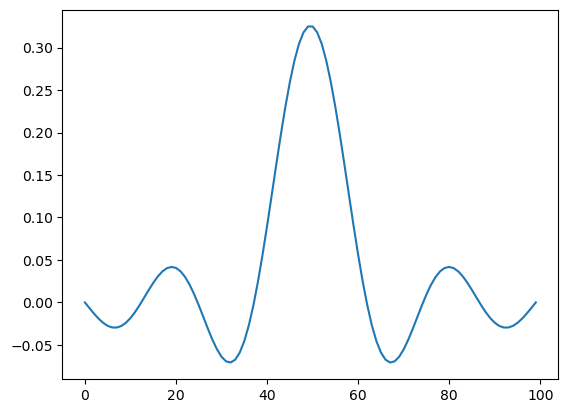

In [250]:
#Plots of our three wavelets
numPoints = 100
a_val = 4
#the custom wavelet plot
vec_custom = custom_wvt(numPoints, a_val)
plt.plot(vec_custom)

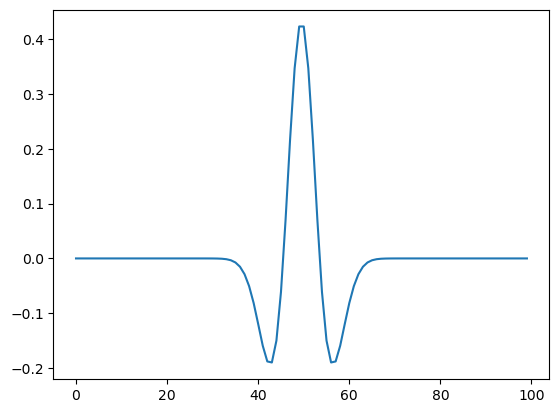

In [251]:
vec_ricker = sig.ricker(numPoints, a_val)
plt.plot(vec_ricker)

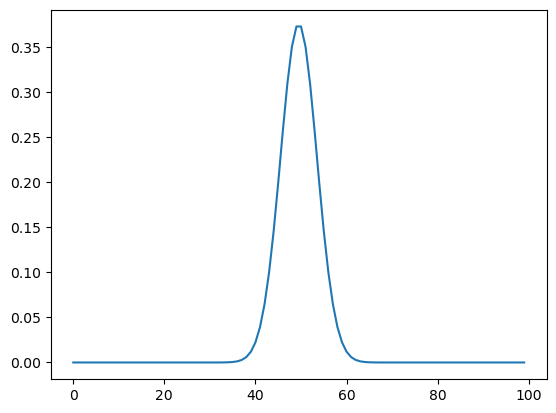

In [252]:
w = 2
vec_morlet = sig.morlet2(numPoints, a_val, w)
plt.plot(abs(vec_morlet))

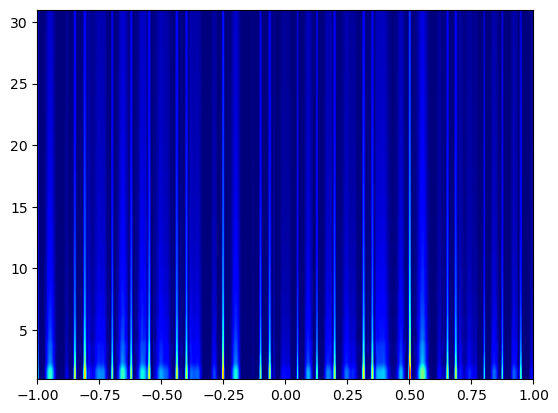

In [253]:
#Define range of widths for the continuous wavelet transform
widths = np.arange(1,31)

#Plot the continuous wavelet transform using the custom wavelet
cwtmatr = sig.cwt(sim_ecg_total, custom_wvt, widths)
cwtmatr_yflip = np.flipud(cwtmatr)
plt.imshow(cwtmatr_yflip, extent=[-1, 1, 1, 31], cmap='jet', aspect='auto', vmax=abs(cwtmatr).max(), vmin=abs(cwtmatr).min())
plt.show()

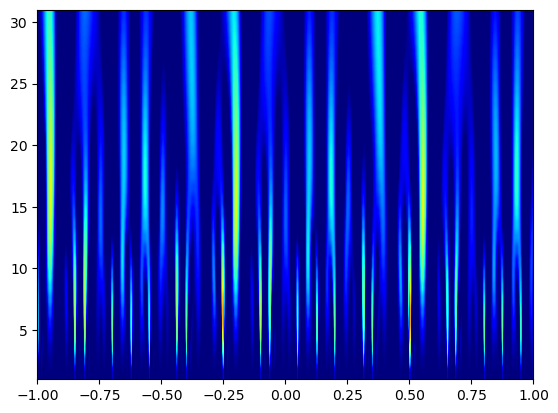

In [254]:
#Plot the continuous wavelet transform using the ricker wavelet
cwtmatr = sig.cwt(sim_ecg_total, sig.ricker, widths)
cwtmatr_yflip = np.flipud(cwtmatr)
plt.imshow(cwtmatr_yflip, extent=[-1, 1, 1, 31], cmap='jet', aspect='auto', vmax=abs(cwtmatr).max(), vmin=abs(cwtmatr).min())
plt.show()


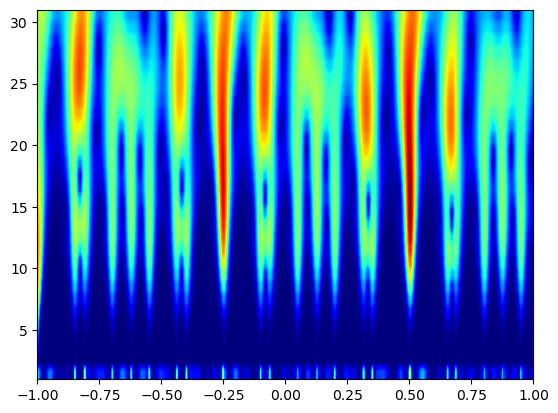

In [255]:
cwtmatr = abs(sig.cwt(sim_ecg_total, sig.morlet2, widths, dtype='complex128')) #the complex morlet wavelet
cwtmatr_yflip = np.flipud(cwtmatr)
plt.imshow(cwtmatr_yflip, extent=[-1, 1, 1, 31], cmap='jet', aspect='auto', vmax=abs(cwtmatr).max(), vmin=abs(cwtmatr).min())
plt.show()
